## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
diabetes_data.loc[:,['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


**<font color='teal'> Plot histograms of each column. </font>**

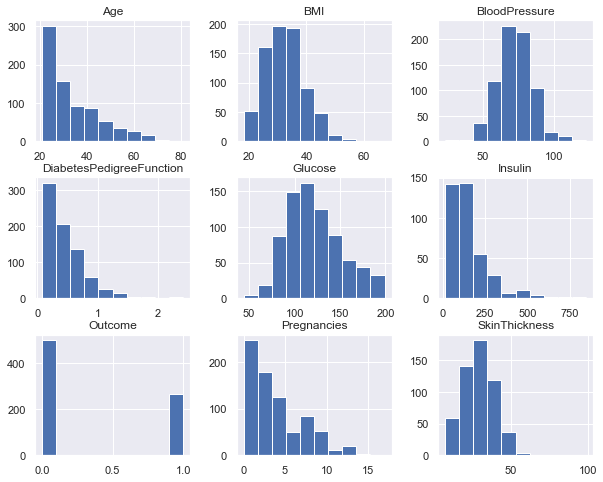

In [7]:
diabetes_data.hist(figsize=(10,8))
plt.show()

#### Replace the zeros with mean and median values.

In [8]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [9]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

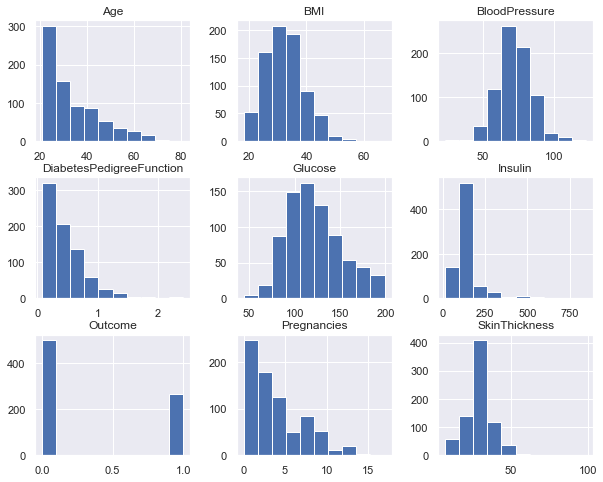

In [10]:
diabetes_data.hist(figsize=(10,8))
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


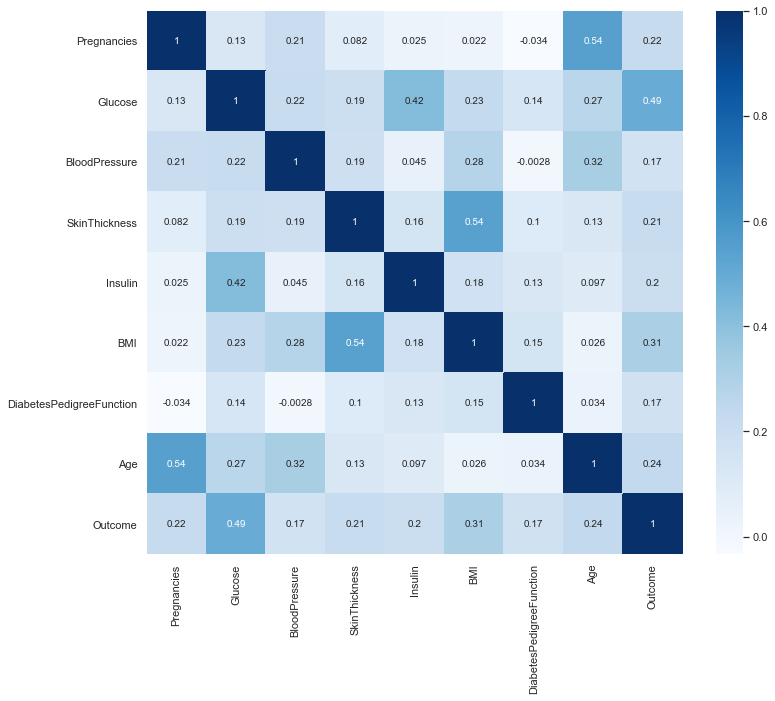

In [11]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

In [12]:
#Scaling after the split below

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [13]:
#Defining my response variable and my array of features
y = diabetes_data['Outcome'].ravel()
X = diabetes_data.drop('Outcome', axis=1)

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21)

#Instantiating the scaler
sc = StandardScaler()

#Fitting the scaler to the training set and transforming it
X_train_scaled = sc.fit_transform(X_train)

#Scaling test set
X_test_scaled = sc.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [15]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,11):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [16]:
#Zipping the lists together and printing the training and test scores for each number of neighbors
k=0
for train, test in zip(train_scores, test_scores):
    k+=1
    print("With {} neighbors the train score is {} and the test score is {}".format(k, round(train,4), round(test, 4)))

With 1 neighbors the train score is 1.0 and the test score is 0.697
With 2 neighbors the train score is 0.8399 and the test score is 0.7013
With 3 neighbors the train score is 0.8361 and the test score is 0.7359
With 4 neighbors the train score is 0.8045 and the test score is 0.7229
With 5 neighbors the train score is 0.8138 and the test score is 0.7489
With 6 neighbors the train score is 0.8119 and the test score is 0.7229
With 7 neighbors the train score is 0.8156 and the test score is 0.7316
With 8 neighbors the train score is 0.8045 and the test score is 0.7143
With 9 neighbors the train score is 0.8156 and the test score is 0.7229
With 10 neighbors the train score is 0.8026 and the test score is 0.7186


**<font color='teal'> Identify the number of neighbors between 1-15 that resulted in the max score in the training dataset. </font>**

In [17]:
#Re-running the loop, from 1 to 15 this time around

test_scores = []
train_scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

#Getting the index of the highest value in the list and adding 1 to it
idx_train= train_scores.index(max(train_scores)) + 1
print("The highest score on the training set is achieved with {} neighbors.".format(idx_train))

The highest score on the training set is achieved with 1 neighbors.


**<font color='teal'> Identify the number of neighbors between 1-15 that resulted in the max score in the testing dataset. </font>**

In [18]:
idx_test = test_scores.index(max(test_scores))+1
print("The highest score on the test set is achieved with {} neighbors.".format(idx_test))

The highest score on the test set is achieved with 11 neighbors.


Plot the train and test model performance by number of neighbors.

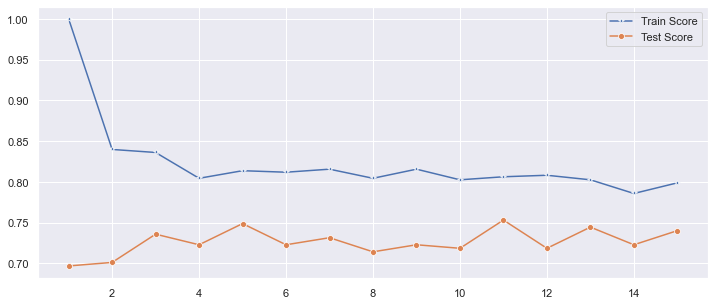

In [19]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,16),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,16),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [20]:
#Based on the plot the best number of neighbors is 11
#Fitting and scoring the model with 11 neighbors

knn_best = KNeighborsClassifier(n_neighbors=11)
knn_best.fit(X_train_scaled,y_train)

knn_best.score(X_test_scaled, y_test)

0.7532467532467533

In [21]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#Creating y_predict
y_pred = knn_best.predict(X_test_scaled)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

Confusion matrix, without normalization
[[133  11]
 [ 46  41]]
Normalized confusion matrix
[[0.92 0.08]
 [0.53 0.47]]


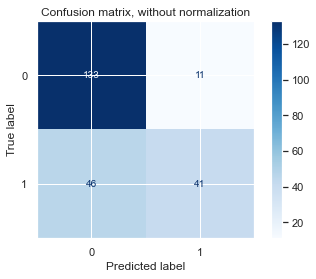

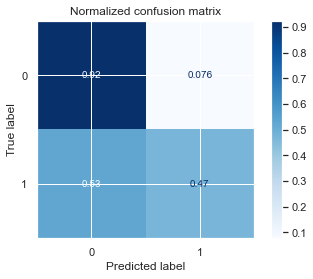

In [22]:
#Names of the classses for confusion matrix plot
class_names=[0,1]
cm = confusion_matrix(y_test, y_pred) #confusion matrix without normalization
cm_norm = cm / cm.astype(np.float).sum(axis=1, keepdims=True) #normalizing the matrix
np.set_printoptions(precision=2)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

#Using plot_confusion_matrix for better visualization
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn_best, X_test_scaled, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**<font color='teal'> Print the classification report </font>**

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       144
           1       0.79      0.47      0.59        87

    accuracy                           0.75       231
   macro avg       0.77      0.70      0.71       231
weighted avg       0.76      0.75      0.74       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
print(knn_cv.fit(X_train_scaled, y_train))

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})


#### Print the best score and best parameter for n_neighbors.

In [25]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.76711664935964
Best Parameters: {'n_neighbors': 11}


Here you can see that the ideal number of n_neighbors for this model is 11 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [26]:
from sklearn.ensemble import RandomForestClassifier

#Creating my parameters grid
param_grid = {'n_estimators':[100,200,250,300,500], 'criterion':['gini', 'entropy'], 'max_depth':[None, 10, 15, 5]}

#Instantiating the stimator
rf = RandomForestClassifier(random_state=21)

#Creating GridSearch Object 
rf_cv = GridSearchCV(rf, param_grid, scoring='accuracy', n_jobs=-1, cv=5)

#Fitting
rf_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=21), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 15, 5],
                         'n_estimators': [100, 200, 250, 300, 500]},
             scoring='accuracy')

In [27]:
print('Best Parameters for RandomForestClassifier: {}'.format(rf_cv.best_params_))
print('Best Score: {}'.format(rf_cv.best_score_))

Best Parameters for RandomForestClassifier: {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
Best Score: 0.7839910003461406
